In [1]:
import matplotlib.pyplot as plt
import gym
import csv
import random
import logging
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D
from tensorflow.keras.optimizers import Adam
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from keras.callbacks import CSVLogger

In [2]:
def build_model(height, width, channels, actions):
    model = Sequential()
    model.add(Convolution2D(32, (8, 8), strides=(4, 4),
              activation='relu', input_shape=(3, height, width, channels)))
    model.add(Convolution2D(64, (4, 4), strides=(2, 2), activation='relu'))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [3]:
def build_agent(model, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(
    ), attr='eps', value_max=1, value_min=.1, value_test=.2, nb_steps=1000000)
    memory = SequentialMemory(limit=10000, window_length=3)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                   enable_dueling_network=True, dueling_type='avg',
                   nb_actions=actions, nb_steps_warmup = 1000000)
    return dqn

In [4]:
env = gym.make("Freeway-v0")
env = gym.wrappers.ResizeObservation(env, (88, 88))
height, width, channels = env.observation_space.shape
actions = env.action_space.n
model = build_model(height, width, channels, actions)

In [5]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 21, 21, 32)     6176      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 9, 9, 64)       32832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 7, 7, 64)       36928     
_________________________________________________________________
flatten (Flatten)            (None, 9408)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4817408   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 7

In [6]:
dqn = build_agent(model, actions)
dqn.compile(Adam(learning_rate=0.01))
log = dqn.fit(env, nb_steps=1000000, visualize=True, verbose=2)

803/1000000: episode: 279, duration: 19.452s, episode steps: 2719, steps per second: 140, episode reward: 15.000, mean reward:  0.006 [ 0.000,  1.000], mean action: 1.000 [0.000, 2.000],  loss: --, mean_q: --, mean_eps: --
 764533/1000000: episode: 280, duration: 19.107s, episode steps: 2730, steps per second: 143, episode reward: 17.000, mean reward:  0.006 [ 0.000,  1.000], mean action: 0.992 [0.000, 2.000],  loss: --, mean_q: --, mean_eps: --
 767271/1000000: episode: 281, duration: 19.760s, episode steps: 2738, steps per second: 139, episode reward: 20.000, mean reward:  0.007 [ 0.000,  1.000], mean action: 0.994 [0.000, 2.000],  loss: --, mean_q: --, mean_eps: --
 770017/1000000: episode: 282, duration: 20.290s, episode steps: 2746, steps per second: 135, episode reward: 14.000, mean reward:  0.005 [ 0.000,  1.000], mean action: 1.012 [0.000, 2.000],  loss: --, mean_q: --, mean_eps: --
 772769/1000000: episode: 283, duration: 20.089s, episode steps: 2752, steps per second: 137, ep

In [7]:
scores = dqn.test(env, nb_episodes = 10, visualize=True)
print(np.mean(scores.history['episode_reward']))

Testing for 10 episodes ...
Episode 1: reward: 21.000, steps: 2738
Episode 2: reward: 21.000, steps: 2718
Episode 3: reward: 21.000, steps: 2760
Episode 4: reward: 22.000, steps: 2739
Episode 5: reward: 21.000, steps: 2723
Episode 6: reward: 21.000, steps: 2716
Episode 7: reward: 21.000, steps: 2726
Episode 8: reward: 21.000, steps: 2733
Episode 9: reward: 21.000, steps: 2717
Episode 10: reward: 21.000, steps: 2757
21.1


In [8]:
env.close()
dqn.save_weights('1M_dqn.h5f')

Text(0, 0.5, 'Score')

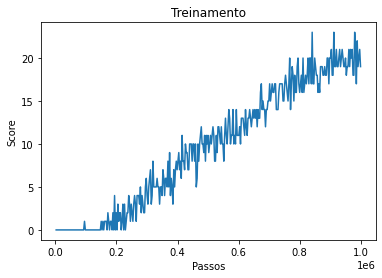

In [26]:
plt.plot(log.history['nb_steps'], log.history['episode_reward'])
plt.title("Treinamento")
plt.xlabel("Passos")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

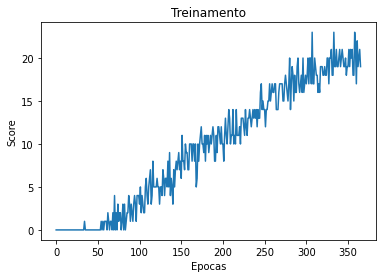

In [25]:
plt.plot(log.epoch, log.history['episode_reward'])
plt.title("Treinamento")
plt.xlabel("Epocas")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

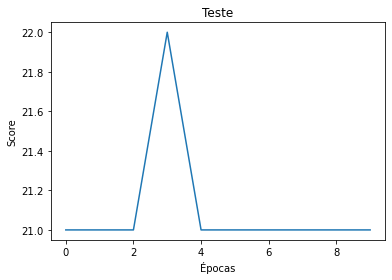

In [11]:
plt.plot(scores.epoch, scores.history['episode_reward'])
plt.title("Teste")
plt.xlabel("Épocas")
plt.ylabel("Score")

In [19]:
np.max(log.history['episode_reward'])

23.0

In [20]:
log.history

{'episode_reward': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  2.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  2.0,
  0.0,
  4.0,
  0.0,
  2.0,
  0.0,
  3.0,
  1.0,
  2.0,
  2.0,
  0.0,
  1.0,
  3.0,
  0.0,
  3.0,
  0.0,
  1.0,
  2.0,
  2.0,
  4.0,
  3.0,
  1.0,
  3.0,
  2.0,
  1.0,
  3.0,
  4.0,
  3.0,
  1.0,
  4.0,
  4.0,
  4.0,
  3.0,
  5.0,
  2.0,
  4.0,
  3.0,
  2.0,
  2.0,
  5.0,
  6.0,
  4.0,
  3.0,
  5.0,
  6.0,
  7.0,
  3.0,
  4.0,
  8.0,
  5.0,
  5.0,
  5.0,
  5.0,
  6.0,
  5.0,
  5.0,
  3.0,
  5.0,
  5.0,
  4.0,
  7.0,
  6.0,
  4.0,
  6.0,
  6.0,
  5.0,
  8.0,
  5.0,
  9.0,
  4.0,
  6.0,
  5.0,
  